# FMI-test | Wind Power

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

## 1. Read and Preprocessing Data

In [2]:
#Import data and print samples
X = pd.read_csv('FMI-Test.csv')
X.sample(10)

,request_id,forecast_time,power_output_w,wind_speed_ms,wind_direction_deg,air_pressure_hpa
212,4350,2020-10-05 20:00:00+03,1272000,9.2,121.0,996.73
261,4350,2020-10-07 22:00:00+03,1308000,9.3,164.0,992.33
278,4323,2020-10-02 02:00:00+03,396880,6.4,105.0,1001.89
297,4323,2020-10-02 21:00:00+03,2652000,12.8,105.0,1004.04
138,4358,2020-10-06 06:00:00+03,2874000,13.8,129.0,990.07
231,4350,2020-10-06 16:00:00+03,2535000,12.5,166.0,988.66
157,4358,2020-10-07 02:00:00+03,1872000,10.8,175.0,990.86
78,4424,2020-10-12 03:00:00+03,0,1.1,105.0,996.98
236,4350,2020-10-06 21:00:00+03,2106000,11.4,196.0,990.19
69,4424,2020-10-11 18:00:00+03,337330,6.1,238.0,997.12


In [3]:
print('-------- COLUMN TYPE --------')
print(X.dtypes)

-------- COLUMN TYPE --------
request_id              int64
forecast_time          object
power_output_w          int64
wind_speed_ms         float64
wind_direction_deg    float64
air_pressure_hpa      float64
dtype: object


In [4]:
#Change column forecast_time to date time format
X['forecast_time'] = pd.to_datetime(X['forecast_time'], format = "%Y-%m-%d %H:%M:%S")
print('---------------- COLUMN TYPE AFTER CHANGING ---------------')
print(X.dtypes)

---------------- COLUMN TYPE AFTER CHANGING ---------------
request_id                                            int64
forecast_time         datetime64[ns, pytz.FixedOffset(180)]
power_output_w                                        int64
wind_speed_ms                                       float64
wind_direction_deg                                  float64
air_pressure_hpa                                    float64
dtype: object


In [5]:
#The request_id column seems to hold no information
#Remove reques_id column and set forecast_time to be the index column
X.drop('request_id', inplace = True, axis = 1)
X.set_index(['forecast_time'], inplace = True)
X.sample(5)

,power_output_w,wind_speed_ms,wind_direction_deg,air_pressure_hpa
forecast_time,,,,
2020-10-13 00:00:00+03:00,2418000,12.2,216.0,993.13
2020-10-03 14:00:00+03:00,2223000,11.7,97.0,1004.26
2020-10-08 00:00:00+03:00,476280,6.8,168.0,992.18
2020-10-20 08:00:00+03:00,835653,8.1,329.0,996.77
2020-10-12 20:00:00+03:00,2106000,11.4,211.0,992.92


## 2. Explore Data

In [6]:
print('Shape =', X.shape)
print()
print('NaN value at each column:')
print(X.isna().sum())

Shape = (330, 4)

NaN value at each column:
power_output_w        0
wind_speed_ms         3
wind_direction_deg    3
air_pressure_hpa      3
dtype: int64


In [7]:
#Test to see if those NaNs are in the same row
X[X.isnull().any(axis = 1)]

,power_output_w,wind_speed_ms,wind_direction_deg,air_pressure_hpa
forecast_time,,,,
2020-10-08 16:00:00+03:00,0,NaN,NaN,NaN
2020-10-08 17:00:00+03:00,0,NaN,NaN,NaN
2020-10-08 18:00:00+03:00,0,NaN,NaN,NaN


There are 3 rows including NaN values out of 330 row, which is nearly 1% of the whole dataset.

The attribute is showns as below.

|**No.**| **Name** | **Definition** |
|:---------|:-----|:----|
|0  | forecast_time      | The forecast_time |
|1  | power_output_w     | The power output in Watt |
|2  | wind_speed_ms      | The wind speed in meters per second |
|3  | wind_direction_deg | The wind direction degree |
|4  | air_pressure_hpa   | The air pressure in hectopascals |

Also, the time is not in the right order. It needs to be sorted.

In [8]:
X = X.sort_values('forecast_time')

In [9]:
X.describe().round(3)

,power_output_w,wind_speed_ms,wind_direction_deg,air_pressure_hpa
count,330.000,327.000,327.000,327.000
mean,1468236.170,9.466,169.881,995.314
std,943428.959,3.261,74.510,5.711
min,0.000,1.000,1.000,977.690
25%,571818.000,7.250,117.000,991.305
50%,1599000.000,10.100,163.000,994.590
75%,2184000.000,11.600,208.500,1000.815
max,3000000.000,16.200,351.000,1005.530


## 3. Visualizing Data

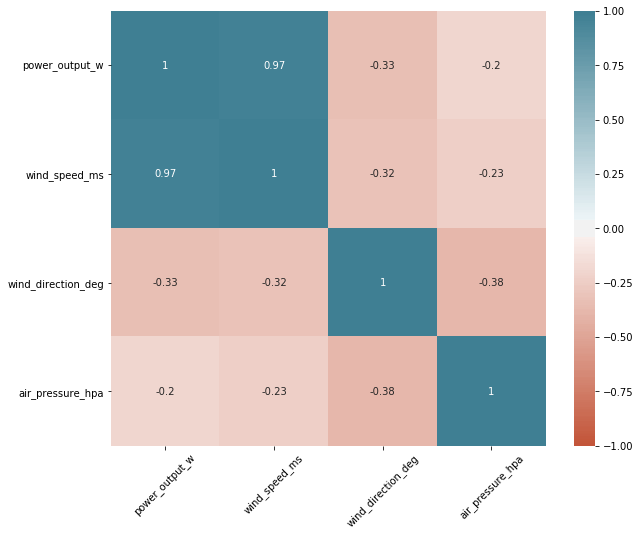

In [10]:
#Correlation matrix
plt.figure(figsize = (10,8))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0
);

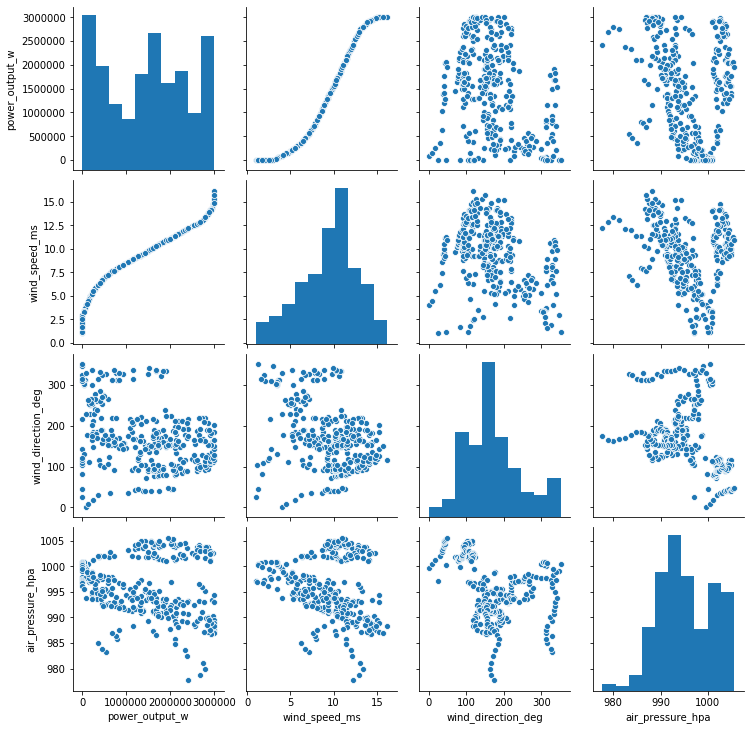

In [11]:
#Pair plot
sns.pairplot(X)
plt.show()

In [12]:
#Chance power_output_w to power_output_kw
X['power_output_w'] = X['power_output_w'] / 1000
X.rename(columns = {'power_output_w':'power_output_kw'}, inplace = True)
X.sample(5)

,power_output_kw,wind_speed_ms,wind_direction_deg,air_pressure_hpa
forecast_time,,,,
2020-10-07 21:00:00+03:00,1833.000,10.7,161.0,993.12
2020-10-08 03:00:00+03:00,250.005,5.5,211.0,994.15
2020-10-21 21:00:00+03:00,2145.000,11.5,156.0,988.77
2020-10-12 05:00:00+03:00,0.000,2.4,117.0,996.18
2020-10-07 00:00:00+03:00,2067.000,11.3,187.0,990.27


In [13]:
#Plot the whole dataset
X.iplot(width = 1.5)

The spreadsheet is missing the data from 8 October at 3 PM to 11 October at 3PM.

In [14]:
#Plot the wind_speed_ms
X['wind_speed_ms'].iplot(xTitle = 'Date', yTitle = 'Wind Speed (ms)', color = 'blue')

The wind speed seems not having a clear trend.

In [15]:
#Plot the power_output_kw
X['power_output_kw'].iplot(xTitle = 'Date', yTitle = 'Power Output (kW)')

The power output trend is quite similar to the wind speed trend. They did have high positive value in the correlation matrix.

In [16]:
#Plot the air_pressure_hpa
X['air_pressure_hpa'].iplot(xTitle = 'Date', yTitle = 'Air pressure (HPA)', color = 'purple')

The air pressure line is up and down normally, except for the period from 6 October at 6 AM to 8 October at 1 AM. At that time, the air pressure went up and down rapidly.

In [17]:
#Plot the wind_direction_deg
X['wind_direction_deg'].iplot(xTitle='Date', yTitle='Wind Direction (degree)', color = 'green')